In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import json
import random
from config import owm_api_key
plt.style.use('seaborn')

In [35]:
# Gather 500 unique cities randomly

cities = pd.DataFrame({
    "City":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[]
})

city_names = []
country_codes = []
lats = []
lngs = []
duplicate = True

for i in range(0, 10):
    duplicate = True
    while duplicate == True:
        lat = random.uniform(-90, 90)
        lng = random.uniform(-180, 180)
        location = (lat, lng)
        city = citipy.nearest_city(lat, lng)
        city_name = city.city_name
        country_code = city.country_code
        
        dup_found = False
        for existing_city in city_names:
            if city_name == existing_city:
                dup_found = True
            
        if dup_found == False:
            city_names.append(city_name)
            country_codes.append(country_code)
            lats.append(lat)
            lngs.append(lng)
            duplicate = False

cities["City"] = city_names
cities["Country"] = country_codes
cities["Latitude"] = lats
cities["Longitude"] = lngs
cities

,City,Country,Latitude,Longitude
0,bengkulu,id,-23.668126,88.345724
1,katsuura,jp,30.350265,144.501194
2,igarka,ru,66.897364,84.938290
3,kavieng,pg,7.807737,153.859061
4,vaini,to,-39.970870,-169.320417
5,butaritari,ki,26.633141,169.848143
6,te anau,nz,-44.963906,161.896731
7,kodiak,us,48.010825,-149.026774
8,illoqqortoormiut,gl,89.659038,-24.386360
9,amderma,ru,87.570980,62.840482


In [36]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

base_url = "http://api.openweathermap.org/data/2.5/forecast"
responses = []
i = 0

for index, row in cities.iterrows():
    i = i+1
    city_name = row["City"]
    country_code = row["Country"]
    params = {
        "q":f"{city_name},{country_code}",
        "appid":owm_api_key,
        "units":"imperial"
    }
    print(f"Retrieving data for city #{i} ({city_name}, {country_code})...")
    print(f"{base_url}?q={city_name},{country_code}&units=imperial&appid=***")
    response = requests.get(base_url, params=params).json()    
    responses.append(response)   

Retrieving data for city #1 (bengkulu, id)...
http://api.openweathermap.org/data/2.5/forecast?q=bengkulu,id&units=imperial&appid=***
Retrieving data for city #2 (katsuura, jp)...
http://api.openweathermap.org/data/2.5/forecast?q=katsuura,jp&units=imperial&appid=***
Retrieving data for city #3 (igarka, ru)...
http://api.openweathermap.org/data/2.5/forecast?q=igarka,ru&units=imperial&appid=***
Retrieving data for city #4 (kavieng, pg)...
http://api.openweathermap.org/data/2.5/forecast?q=kavieng,pg&units=imperial&appid=***
Retrieving data for city #5 (vaini, to)...
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=imperial&appid=***
Retrieving data for city #6 (butaritari, ki)...
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=imperial&appid=***
Retrieving data for city #7 (te anau, nz)...
http://api.openweathermap.org/data/2.5/forecast?q=te anau,nz&units=imperial&appid=***
Retrieving data for city #8 (kodiak, us)...
http://api.openweathermap.org/data/

In [37]:
cities["Temperature (F)"] = ""
cities["Humidity (%)"] = ""
cities["Cloudiness (%)"] = ""
cities["Wind Speed (mph)"] = ""

avg_temps = []
avg_humidities = []
avg_clouds = []
avg_winds = []
i = 0

for response in responses:
    temps = []
    humidities = []
    winds = []
    clouds = []
    
    try:
        forecast = response["list"]
        for item in forecast:
            temp = item["main"]["temp"]
            temps.append(temp)
            humidity = item["main"]["humidity"]
            humidities.append(humidity)
            cloudiness = item["clouds"]["all"]
            clouds.append(cloudiness)
            wind = item["wind"]["speed"]
            winds.append(wind)
        avg_temp = np.mean(temps)
        avg_humidity = np.mean(humidities)
        avg_cloudiness = np.mean(clouds)
        avg_wind = np.mean(winds)
    except KeyError:
        print(f"Could not retrieve data for {cities.loc[i,'City']}, {cities.loc[i,'Country']}")
        avg_temp = None
        avg_humidity = None
        avg_cloudiness = None
        avg_wind = None
    avg_temps.append(avg_temp)
    avg_humidities.append(avg_humidity)
    avg_clouds.append(avg_cloudiness)
    avg_winds.append(avg_wind)
    i = i+1
    
cities["Temperature (F)"] = avg_temps
cities["Humidity (%)"] = avg_humidities
cities["Cloudiness (%)"] = avg_clouds
cities["Wind Speed (mph)"] = avg_winds
cities

Could not retrieve data for illoqqortoormiut, gl
Could not retrieve data for amderma, ru


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,bengkulu,id,-23.668126,88.345724,81.063421,99.184211,59.263158,6.600000
1,katsuura,jp,30.350265,144.501194,53.929474,97.789474,21.894737,10.595000
2,igarka,ru,66.897364,84.938290,-6.140526,70.526316,68.736842,12.513421
3,kavieng,pg,7.807737,153.859061,84.549737,100.000000,45.789474,3.976316
4,vaini,to,-39.970870,-169.320417,76.848947,99.763158,85.894737,15.355526
5,butaritari,ki,26.633141,169.848143,82.827895,100.000000,42.105263,10.267632
6,te anau,nz,-44.963906,161.896731,49.814211,77.184211,10.526316,3.041842
7,kodiak,us,48.010825,-149.026774,34.489211,98.236842,19.578947,16.079737
8,illoqqortoormiut,gl,89.659038,-24.386360,NaN,NaN,NaN,NaN
9,amderma,ru,87.570980,62.840482,NaN,NaN,NaN,NaN


In [3]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

# base_url = "https://api.openweathermap.org/data/2.5/weather"
# responses = []
# i = 0

# for index, row in cities.iterrows():
#     i = i+1
#     city_name = row["City"]
#     country_code = row["Country"]
#     params = {
#         "q":f"{city_name},{country_code}",
#         "appid":owm_api_key,
#         "units":"imperial"
#     }
#     print(f"Retrieving data for city #{i} ({city_name}, {country_code})...")
#     print(f"{base_url}?q={city_name},{country_code}&units=imperial&appid=***")
#     response = requests.get(base_url, params=params).json()    
#     responses.append(response)    

Making request #1 for mergui, mm...
https://api.openweathermap.org/data/2.5/weather?q=mergui,mm&units=imperial&appid=**********************
Making request #2 for mataura, pf...
https://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&appid=**********************
Making request #3 for norman wells, ca...
https://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&appid=**********************
Making request #4 for airai, pw...
https://api.openweathermap.org/data/2.5/weather?q=airai,pw&units=imperial&appid=**********************
Making request #5 for punta arenas, cl...
https://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&appid=**********************
Making request #6 for nanortalik, gl...
https://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&appid=**********************
Making request #7 for rikitea, pf...
https://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=*********

In [4]:
# cities["Temperature (F)"] = ""
# cities["Humidity (%)"] = ""
# cities["Cloudiness (%)"] = ""
# cities["Wind Speed (mph)"] = ""

# temps = []
# humidities = []
# clouds = []
# winds = []
# i = 0

# for response in responses:
#     try:
#         temp = response["main"]["temp"]
#         humidity = response["main"]["humidity"]
#         cloudiness = response["clouds"]["all"]
#         wind = response["wind"]["speed"]
#     except KeyError:
#         print(f"Could not retrieve data for {cities.loc[i,'City']}, {cities.loc[i,'Country']}")
#         temp = None
#         humidity = None
#         cloudiness = None
#         wind = None
#     temps.append(temp)
#     humidities.append(humidity)
#     clouds.append(cloudiness)
#     winds.append(wind)
#     i = i+1
    
# cities["Temperature (F)"] = temps
# cities["Humidity (%)"] = humidities
# cities["Cloudiness (%)"] = clouds
# cities["Wind Speed (mph)"] = winds
# cities.head()

Could not retrieve data for mergui, mm
Could not retrieve data for airai, pw
Could not retrieve data for palabuhanratu, id
Could not retrieve data for spornoye, ru


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mergui,mm,11.630521,98.627505,NaN,NaN,NaN,NaN
1,mataura,pf,-86.528193,-157.238227,33.8,100.0,75.0,6.93
2,norman wells,ca,74.491104,-119.280961,3.2,84.0,20.0,5.82
3,airai,pw,11.571790,137.588948,NaN,NaN,NaN,NaN
4,punta arenas,cl,-65.178682,-85.492823,51.8,43.0,40.0,23.04


In [38]:
# Save both a CSV of all data retrieved and png images for each scatter plot.
cities.to_csv("weather_data.csv", index=False, header=True)

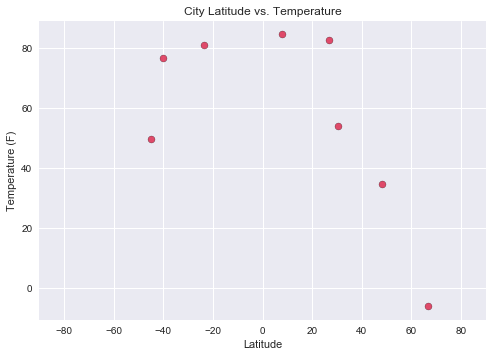

In [39]:
plt.scatter(cities["Latitude"], cities["Temperature (F)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Temperature")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

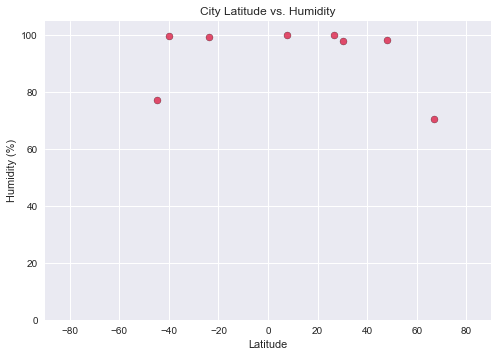

In [40]:
plt.scatter(cities["Latitude"], cities["Humidity (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,105)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

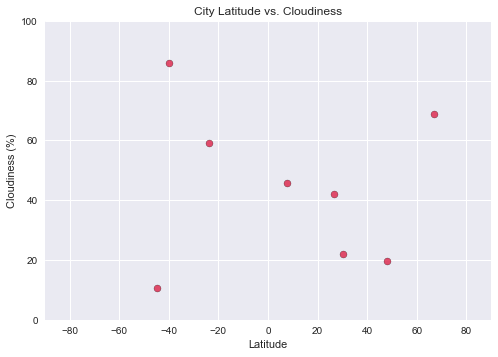

In [41]:
plt.scatter(cities["Latitude"], cities["Cloudiness (%)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

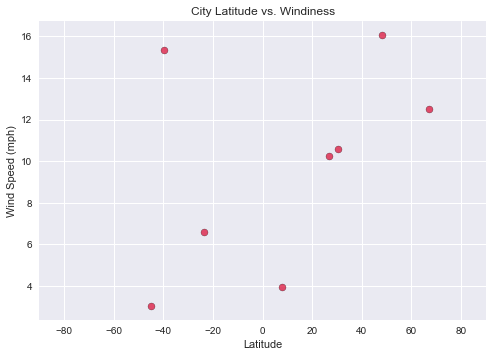

In [42]:
plt.scatter(cities["Latitude"], cities["Wind Speed (mph)"], c="crimson", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Windiness")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()